<a href="https://colab.research.google.com/github/sangam11a/RNN-1/blob/main/Single_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C3/W3/ungraded_labs/C3_W3_Lab_1_single_layer_LSTM.ipynb

--2022-08-01 05:44:04--  https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C3/W3/ungraded_labs/C3_W3_Lab_1_single_layer_LSTM.ipynb
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘C3_W3_Lab_1_single_layer_LSTM.ipynb’

C3_W3_Lab_1_single_     [ <=>                ] 150.89K  --.-KB/s    in 0.1s    

2022-08-01 05:44:05 (1.46 MB/s) - ‘C3_W3_Lab_1_single_layer_LSTM.ipynb’ saved [154508]



In [2]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7TGLRO/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7TGLRO/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7TGLRO/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:

BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [4]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 34s 250ms/step - loss: 0.6061 - accuracy: 0.6534 - val_loss: 0.4286 - val_accuracy: 0.8079
Epoch 2/10
98/98 [==============================] - 25s 252ms/step - loss: 0.3275 - accuracy: 0.8674 - val_loss: 0.3720 - val_accuracy: 0.8487
Epoch 3/10
98/98 [==============================] - 25s 247ms/step - loss: 0.2506 - accuracy: 0.9063 - val_loss: 0.3762 - val_accuracy: 0.8376
Epoch 4/10
98/98 [==============================] - 25s 250ms/step - loss: 0.1943 - accuracy: 0.9316 - val_loss: 0.4049 - val_accuracy: 0.8435
Epoch 5/10
98/98 [==============================] - 25s 254ms/step - loss: 0.1617 - accuracy: 0.9424 - val_loss: 0.4228 - val_accuracy: 0.8344
Epoch 6/10
98/98 [==============================] - 25s 251ms/step - loss: 0.1285 - accuracy: 0.9558 - val_loss: 0.4792 - val_accuracy: 0.8344
Epoch 7/10
98/98 [==============================] - 25s 255ms/step - loss: 0.1229 - accuracy: 0.9569 - val_loss: 0.5171 - val_accuracy: 0.8270

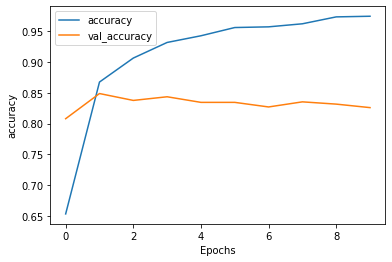

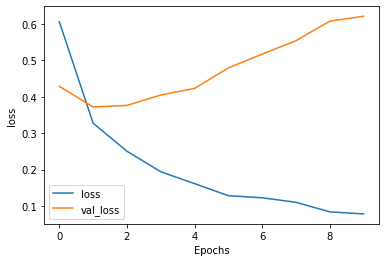

In [7]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [8]:
!git init


Initialized empty Git repository in /content/.git/


In [10]:
!git remote add rnn1 https://github.com/sangam11a/RNN-1.git

In [16]:
!git add .
!git branch -M main
!git commit -m "first commit"
!git config --global user.email "sangam.thapa218@gmail.com"
!git config --global user.name "Sangam thapa"
!git push -u rnn1 master

On branch main
nothing to commit, working tree clean
error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/sangam11a/RNN-1.git'


In [17]:
!git remote -v


rnn1	https://github.com/sangam11a/RNN-1.git (fetch)
rnn1	https://github.com/sangam11a/RNN-1.git (push)


In [19]:
!git init
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/sangam11a/RNN-1.git
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
On branch main
nothing to commit, working tree clean
fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [20]:
!git branch master
